In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Candidate.csv')
print(data)


  state AccountType  Education  Employment Application on  Y/N
0    MP         NaN   Bachelor    Employed         Online  Yes
1    MP     Savings  Doctorate  Unemployed        Offline   No
2    MP     Savings   Bachelor    Employed         Online  Yes
3    MH     Current     Master    Employed         Online   No
4    MP         NaN  Doctorate    Employed         Online  Yes
5    MP     Savings  Doctorate  Unemployed         Online  Yes
6    MP         NaN     Master  Unemployed        Offline   No


In [2]:
concept = np.array(data)[:,:-1]
print(concept)

[['MP' nan 'Bachelor' 'Employed' 'Online']
 ['MP' 'Savings' 'Doctorate' 'Unemployed' 'Offline']
 ['MP' 'Savings' 'Bachelor' 'Employed' 'Online']
 ['MH' 'Current' 'Master' 'Employed' 'Online']
 ['MP' nan 'Doctorate' 'Employed' 'Online']
 ['MP' 'Savings' 'Doctorate' 'Unemployed' 'Online']
 ['MP' nan 'Master' 'Unemployed' 'Offline']]


In [3]:
target = np.array(data)[:,-1]
print(target)

['Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No']


In [4]:
def learn(concepts, target): 
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)  

    for i, h in enumerate(concepts):
      #  print("\nInstance", i+1 , "is ", h)
        if target[i] == "Yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    specific_h[x] ='?'                     
                    general_h[x][x] ='?'
                   
        if target[i] == "No":            
          #  print("Instance is Negative ")
            for x in range(len(specific_h)): 
                if h[x]!= specific_h[x]:                    
                    general_h[x][x] = specific_h[x]                
                else:                    
                    general_h[x][x] = '?'   
                    
        print("Specific Bundary after ", i+1, "Instance is ", specific_h)         
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")
        
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]    
    for i in indices:   
        general_h.remove(['?', '?', '?', '?', '?', '?']) 
    return specific_h, general_h 


Initialization of specific_h and genearal_h

Specific Boundary:  ['MP' nan 'Bachelor' 'Employed' 'Online']

Generic Boundary:  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]
Instance is Positive 
Specific Bundary after  1 Instance is  ['MP' '?' 'Bachelor' 'Employed' 'Online']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]


Specific Bundary after  2 Instance is  ['MP' '?' 'Bachelor' 'Employed' 'Online']
Generic Boundary after  2 Instance is  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', 'Bachelor', '?', '?'], ['?', '?', '?', 'Employed', '?'], ['?', '?', '?', '?', 'Online']]


Instance is Positive 
Specific Bundary after  3 Instance is  ['MP' '?' 'Bachelor' 'Employed' 'Online']
Generic Boundary after  3 Instance is  [['?', '?', '?', '?', '?'], ['?', '?'

<function matplotlib.pyplot.show(close=None, block=None)>

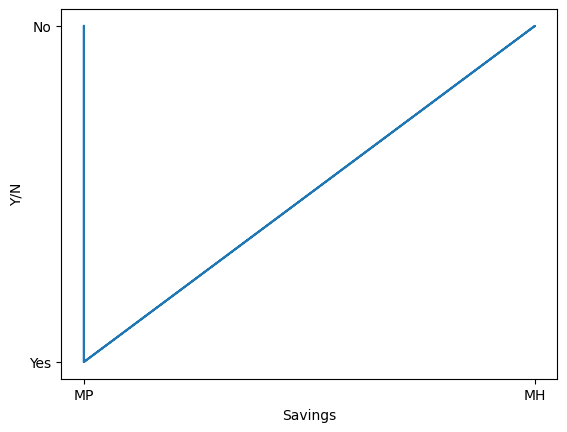

In [15]:
s_final, g_final = learn(concept, target)

plt.plot(concept[:,0],target)
plt.xlabel("Savings")
plt.ylabel("Y/N")  
plt.show


In [9]:
print("Final Specific_h: ", s_final,"\n", sep="\n")
print("Final General_h: ", g_final, sep="\n")

Final Specific_h: 
['MP' '?' '?' '?' 'Online']


Final General_h: 
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', 'Online']]
